<a href="https://colab.research.google.com/github/socrativejh/2023TSMSH2/blob/main/Colaboratory%EC%97%90_%EC%98%A4%EC%8B%A0_%EA%B2%83%EC%9D%84_%ED%99%98%EC%98%81%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# '어신' 시장 경쟁력 분석 및 고객 반응

In [ ]:
!pip install google-play-scraper

In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
!pip install googletrans

## **Google Play** 시장 경쟁력 분석
### 다른 서비스와 비교 - 낚시 어플 Top6

**Google Play**를 선택한 이유:

*   앱스토어에 올라와 있는 서비스는 어신, 물때와 날씨, 피싱 태그, 윈드 파인더 이렇게 4개인데, 리뷰 개수 등 사용자 수가 적음
*   주 사용자 연령층이 30,40대 (대표님 말씀)인 만큼 구글 플레이 사용자 수가 많음

출처: https://superbite.net/fishing-application-top7/

In [4]:
from collections import Counter
from google_play_scraper import app, Sort
from textblob import TextBlob  # Example library
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from tabulate import tabulate

# Replace with the app's package name
app_package_names = ['io.sgma.uhshin',
                    'com.tw.twapplication',
                    'com.withmkt.moolban',
                    'kr.co.atcultures.moontides',
                    'com.fishingtags',
                    'com.studioeleven.windfinder']

app_data = []  # List to store data for each app

for app_package_name in app_package_names:
    try:
        result = app(
            app_package_name,
            lang='ko',
            country='kr'
        )

        sign =['(', '-', ' ', ':']
        title = result['title']
        for i in sign:
          title = title.split(i)[0]

        data = {
            'Title': title,
            'Score': result['score'],
            'Ratings': result['ratings'],
            'Reviews': result['reviews'],
            'Installs': result['installs'],
            'Genre': result['genre']
        }
        app_data.append(data)  # Append the app data to the list

    except Exception as e:
        print(f"Error processing {app_package_name}: {e}")

# Create the DataFrame
df = pd.DataFrame(app_data)
df = df.sort_values(by='Score', ascending=False)
table = tabulate(df, headers='keys', tablefmt='grid')
print(table)

+----+--------------------+---------+-----------+-----------+------------+------------------+
|    | Title              |   Score |   Ratings |   Reviews | Installs   | Genre            |
+====+====================+=========+===========+===========+============+==================+
|  0 | 어신               | 4.78417 |      2780 |      1123 | 100,000+   | 스포츠           |
+----+--------------------+---------+-----------+-----------+------------+------------------+
|  5 | Windfinder         | 4.75849 |     71283 |       191 | 5,000,000+ | 날씨             |
+----+--------------------+---------+-----------+-----------+------------+------------------+
|  3 | 물때와날씨         | 4.53429 |     16553 |      5989 | 1,000,000+ | 여행 및 지역정보 |
+----+--------------------+---------+-----------+-----------+------------+------------------+
|  4 | 피싱태그           | 4.29474 |       110 |        27 | 5,000+     | 소셜             |
+----+--------------------+---------+-----------+-----------+------------+-----------

'어신'의 시장 경쟁력을 평가하기 위해서는 단순히 하나의 지표만으로 판단하기 어렵고, 여러 지표들을 종합적으로 고려해야 함.

**다음과 같은 지표들을 참고하여 분석 가능:**

* **Score:** 앱 평가 점수 - 사용자 만족도\
'어신'의 사용자 만족도는 평가항목 중 1등

* **Ratings:** 앱 평가 개수 - 앱의 인지도와 사용자 참여도\
'어신'은 2780개로 다른 앱들에 비해 상대적으로 적은 편. 이는 '어신'이 출시된 지 얼마 되지 않았거나, 앱의 홍보가 부족할 수 있음.

* **Reviews:** 앱 리뷰 개수 - 사용자들의 의견과 피드백\
'어신'은 1123개로, Ratings에 비해 상대적으로 많음. 이는 앱을 사용한 사용자들이 적극적으로 의견을 남기고 있다는 것을 의미함.

* **Installs:** 앱 설치 수 - 앱의 인지도와 인기\
'어신'은 100,000+로, 다른 앱들에 비해 낮은 편. 이는 '어신'이 아직 시장에서 큰 인지도를 얻지 못했다는 것을 의미함.

**종합적인 분석:**

* '어신'은 높은 Score를 통해 앱의 품질과 사용자 만족도가 높다는 것을 보여준다.
* 하지만 Ratings와 Installs가 상대적으로 낮은 것은 '어신'의 시장 경쟁력이 아직 충분하지 않다는 것을 의미한다.
* '어신'은 타사 앱을 사용하는 사람들을 불러들이기 위해 그들과 차별화되는 서비스 제공이 필요하다.


## 고객 반응 분석

### 리뷰 감정 분석

In [7]:
from collections import Counter
from google_play_scraper import app, Sort, reviews
from textblob import TextBlob  # Example library
from googletrans import Translator

app_package_name = 'io.sgma.uhshin'

result, continuation_token = reviews(
    app_package_name,
    lang='ko', # defaults to 'en'
    country='kr', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=1000, # defaults to 100
)

# Extract keywords from reviews
keywords = []
for review in result:
  words = review['content'].split()
  keywords.extend(words)

# Count keyword occurrences
keyword_counts = Counter(keywords)

# Top 100 most used keywords
top_keywords = keyword_counts.most_common(100)
print(top_keywords)

# Define sentiment analysis (you'll need a sentiment analysis library)
translator = Translator()

def analyze_sentiment_with_translation(text):
    translated = translator.translate(text, dest='en').text
    analysis = TextBlob(translated)
    return analysis.sentiment.polarity

def get_sentiment(text):
  analysis = analyze_sentiment_with_translation(text)
  if analysis > 0:
    return 'positive'
  elif analysis < 0:
    return 'negative'
  else:
    return 'neutral'

# Analyze sentiment for each keyword and count sentiment types
sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}
for keyword, count in top_keywords:
  sentiment = get_sentiment(keyword)
  sentiment_counts[sentiment] += 1

# Print the sentiment counts
print("Sentiment Counts:")
print(f"Positive: {sentiment_counts['positive']}")
print(f"Negative: {sentiment_counts['negative']}")
print(f"Neutral: {sentiment_counts['neutral']}")

[('좋아요', 101), ('잘', 57), ('낚시', 51), ('너무', 50), ('굿', 46), ('물때', 34), ('한눈에', 32), ('어플', 31), ('좋은', 28), ('수', 27), ('다른', 26), ('앱', 25), ('아주', 24), ('보기', 24), ('다', 24), ('업데이트', 23), ('있습니다.', 22), ('좋네요', 22), ('좋습니다', 22), ('정보가', 22), ('포인트', 21), ('보고', 21), ('어신', 19), ('사용하기', 19), ('정말', 19), ('많이', 19), ('날씨', 17), ('편하고', 17), ('계속', 16), ('유용하게', 16), ('많은', 16), ('좋음', 16), ('등', 16), ('정보를', 15), ('👍', 15), ('도움이', 14), ('최고의', 14), ('있습니다', 13), ('감사합니다', 13), ('더', 13), ('있어', 13), ('합니다', 12), ('유용한', 11), ('사용하고', 11), ('바람', 11), ('있으면', 11), ('왜', 11), ('항상', 10), ('사용', 10), ('쉽게', 10), ('것', 10), ('정보', 10), ('있어서', 10), ('같습니다.', 10), ('입니다', 9), ('정확한', 9), ('좋습니다.', 9), ('좋겠습니다', 9), ('필요한', 9), ('감사합니다.', 9), ('같습니다', 9), ('최고입니다', 9), ('좋아요.', 9), ('지도가', 9), ('매우', 9), ('같아요', 9), ('다시', 9), ('좀', 9), ('하고', 8), ('조아요', 8), ('다양한', 8), ('대한', 8), ('바다', 8), ('해도', 7), ('어종별', 7), ('꼭', 7), ('좀더', 7), ('어플이', 7), ('볼', 7), ('있게', 7), ('로딩이', 7), ('좋은데

부정적인 키워드보다 긍정적인 키워드가 많음: 고객 반응은 대부분 긍정적\
(자연어로 작성되는 리뷰 특성 상 모든 형태소를 다 분석해서 neutral이 많음)




### 낮은 평점 리뷰 키워드

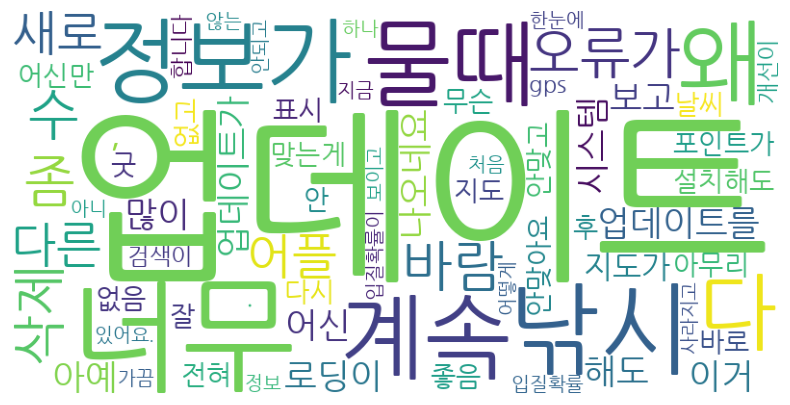

 index Keyword  Count
     0    업데이트      1
     1      낚시      1
     2     정보가      1
     3      물때      1
     4     오류가      1
     5      바람      1
     6      삭제      1
     7      어플      1
     8      새로      1
     9   업데이트를      1
    10   업데이트가      1
    11     로딩이      1
    12      이거      1
    13      아예      1
    14    나오네요      1
    15      해도      1
    16     시스템      1
    17     지도가      1
    18    설치해도      1
    19      전혀      1
    20     어신만      1
    21    안맞아요      1
    22      좋음      1
    23      표시      1
    24      없음      1
    25    포인트가      1
    26      무슨      1
    27      날씨      1
    28     맞는게      1
    29      지도      1


In [17]:
from collections import Counter
from google_play_scraper import app, Sort, reviews
from textblob import TextBlob  # Example library
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from googletrans import Translator
import pandas as pd

app_package_name = 'io.sgma.uhshin'

result, continuation_token = reviews(
    app_package_name,
    lang='ko', # defaults to 'en'
    country='kr', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=1000, # defaults to 100
)

# Extract keywords from reviews
keywords = []
for review in result:
  if review['score'] in [1, 2, 3]:  # Filter for reviews with score 1, 2, or 3
    words = review['content'].split()
    keywords.extend(words)

# Count keyword occurrences
keyword_counts = Counter(keywords)

# Top 10 most used keywords
top_keywords = keyword_counts.most_common(70)

# Convert top_keywords to a dictionary
keyword_dict = dict(top_keywords)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
STOPWORDS = {"더", "것", "같습니다.", "좋습니다.", "입니다", "있어서", ",", "안", "후", "ㆍ", "사용하기", "왜", "등", "굿", "다른", "앱", "다", "정보를", "있으면", "사용하고", "감사합니다.", "감사합니다", "좋아요.", "수", "정말", "많이", "있습니다", "보기", "항상", "계속", "어신", "보고", "있어", "좋겠습니다", "좋네요", "아주","좋습니다", "합니다", "있어", "좀", "잘", "너무", "있습니다."}

# Create a word cloud with sentiment colors
wordcloud = WordCloud(
    width=800, height=400,
    font_path = font_path,
    background_color='white',
    colormap='viridis',  # Use a valid matplotlib colormap name
    collocations=False,
    stopwords=STOPWORDS
).generate_from_frequencies(keyword_dict)  # Use generate_from_frequencies

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

top_keywords_filtered = [keyword for keyword, count in top_keywords if keyword not in STOPWORDS]
top_keywords_filtered = Counter(top_keywords_filtered).most_common(30)
df = pd.DataFrame(top_keywords_filtered, columns=['Keyword', 'Count'])
df = df.reset_index()  # Reset index for better table display

# Print the table
print(df.to_string(index=False))

### 높은 평점 리뷰 키워드



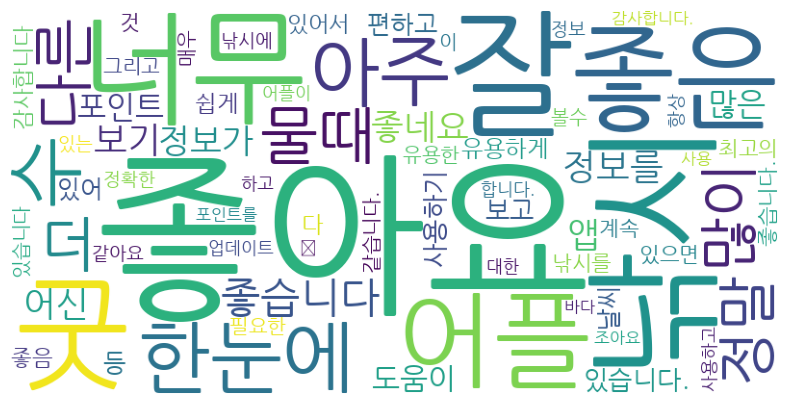

 index Keyword  Count
     0     좋아요      1
     1      낚시      1
     2      좋은      1
     3      어플      1
     4     한눈에      1
     5      물때      1
     6     정보가      1
     7     포인트      1
     8      많은      1
     9     도움이      1
    10     편하고      1
    11      날씨      1
    12      쉽게      1
    13    유용하게      1
    14      좋음      1
    15     최고의      1
    16     낚시를      1
    17     유용한      1
    18     필요한      1
    19     그리고      1
    20       👍      1
    21      볼수      1
    22      매우      1
    23       이      1
    24      있는      1
    25     정확한      1
    26      정보      1
    27     낚시에      1
    28     같아요      1
    29      하고      1


In [18]:
from collections import Counter
from google_play_scraper import app, Sort, reviews
from textblob import TextBlob  # Example library
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from googletrans import Translator
import pandas as pd

app_package_name = 'io.sgma.uhshin'

result, continuation_token = reviews(
    app_package_name,
    lang='ko', # defaults to 'en'
    country='kr', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=1000, # defaults to 100
    filter_score_with=5  # Filter for reviews with score 5
)

# Extract keywords from reviews
keywords = []
for review in result:
  words = review['content'].split()
  keywords.extend(words)

# Count keyword occurrences
keyword_counts = Counter(keywords)

# Top 10 most used keywords
top_keywords = keyword_counts.most_common(70)

# Convert top_keywords to a dictionary
keyword_dict = dict(top_keywords)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
STOPWORDS = {"더", "것", "같습니다.", "좋습니다.", "입니다", "있어서", ",", "안", "후", "ㆍ", "사용하기", "왜", "등", "굿", "다른", "앱", "다", "정보를", "있으면", "사용하고", "감사합니다.", "감사합니다", "좋아요.", "수", "정말", "많이", "있습니다", "보기", "항상", "계속", "어신", "보고", "있어", "좋겠습니다", "좋네요", "아주","좋습니다", "합니다", "있어", "좀", "잘", "너무", "있습니다."}

# Create a word cloud with sentiment colors
wordcloud = WordCloud(
    width=800, height=400,
    font_path = font_path,
    background_color='white',
    colormap='viridis',  # Use a valid matplotlib colormap name
    collocations=False,
    stopwords=STOPWORDS
).generate_from_frequencies(keyword_dict)  # Use generate_from_frequencies

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

top_keywords_filtered = [keyword for keyword, count in top_keywords if keyword not in STOPWORDS]
top_keywords_filtered = Counter(top_keywords_filtered).most_common(30)
df = pd.DataFrame(top_keywords_filtered, columns=['Keyword', 'Count'])
df = df.reset_index()  # Reset index for better table display

# Print the table
print(df.to_string(index=False))

어신 앱은 사용자들에게 높은 만족도를 제공하고 있으며, \
특히 낚시 포인트 정보, 물때 정보, 날씨(바람) 정보를 동시에 제공한다는 점에서 긍정적인 평가가 많다.\
하지만 앱의 기능 개선 특히 업데이트와 로그인 관련 이슈 개선, 물때, 풍속, 수온 등 실시간 정보를 정확하게 받아오는 것이 중요해 보인다.